# Support Vector Machine (SVM) Method

In [1]:
### SVM
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split
ops.reset_default_graph()

In [2]:
sess = tf.Session()
# Load the data
features = np.loadtxt("features.txt", delimiter=",")
labels = np.loadtxt("labels.txt", delimiter=",")
x_all = features
#y_all = labels
y_all = np.array([1 if y == 0 else -1 for y in labels])
# normalize
x_all = (x_all - x_all.min(0)) / x_all.ptp(0)
#Split the data in train & test
x_vals_train, x_vals_test, y_vals_train, y_vals_test = train_test_split(x_all, y_all)

In [3]:
# Declare batch size
batch_size = 200
epochs = 1000
learning_parameter = 0.04
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 244], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[244, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

# Declare model operations
model_output = tf.subtract(tf.matmul(x_data, A), b)

# Declare vector L2 'norm' function squared
l2_norm = tf.reduce_sum(tf.square(A))

# Declare loss function
# Loss = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
# L2 regularization parameter, alpha
alpha = tf.constant([0.01])
# Margin term in loss
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))
# Put terms together
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

# Declare prediction function
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(learning_parameter)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

Step #100 A = [[-0.22041912]
 [-0.47268757]
 [ 0.39102492]
 [-1.0089285 ]
 [ 0.5324972 ]
 [-0.43094763]
 [-0.21811336]
 [-0.33605435]
 [ 0.981263  ]
 [ 2.036354  ]
 [-1.2686439 ]
 [ 1.5101231 ]
 [-0.10848805]
 [-0.40357152]
 [ 0.5954068 ]
 [ 0.4600314 ]
 [-0.42332304]
 [ 1.6351736 ]
 [-0.33483166]
 [ 0.4266449 ]
 [-1.0177583 ]
 [-0.7046592 ]
 [-0.24569815]
 [ 0.56726444]
 [-0.43358257]
 [ 1.0417854 ]
 [-1.1586803 ]
 [ 1.1536174 ]
 [ 0.14236932]
 [-1.1226807 ]
 [-0.08893023]
 [-0.8759963 ]
 [-0.8733988 ]
 [ 1.3022171 ]
 [-0.16190113]
 [ 1.5896024 ]
 [ 0.7711629 ]
 [-2.0613527 ]
 [ 1.3841149 ]
 [ 0.21844873]
 [-0.8816931 ]
 [ 1.0781732 ]
 [-0.5755322 ]
 [-0.9450969 ]
 [-0.6880641 ]
 [ 0.02782152]
 [-0.66087675]
 [ 0.5780974 ]
 [ 1.0604461 ]
 [ 1.079478  ]
 [ 1.0955867 ]
 [ 0.31788272]
 [ 1.2365252 ]
 [ 1.5815794 ]
 [ 0.77152586]
 [ 1.1834043 ]
 [-1.6149405 ]
 [ 0.75653064]
 [-0.6537247 ]
 [ 0.12085731]
 [-0.3344503 ]
 [-1.3066914 ]
 [-0.9178343 ]
 [-0.9353857 ]
 [-0.82185435]
 [ 0.229866

Step #300 A = [[-2.6894411e-01]
 [-4.2030615e-01]
 [ 5.6367075e-01]
 [-8.3030647e-01]
 [ 3.5500497e-01]
 [-3.6209151e-01]
 [-3.4843487e-01]
 [-1.9306135e-01]
 [ 7.9780066e-01]
 [ 1.6744174e+00]
 [-8.3838201e-01]
 [ 1.4065971e+00]
 [ 1.9174495e-01]
 [-4.6148884e-01]
 [ 6.0148960e-01]
 [ 6.0206133e-01]
 [-2.9147759e-01]
 [ 1.6548033e+00]
 [-3.8285264e-01]
 [ 4.0246001e-01]
 [-1.1373018e+00]
 [-4.9657458e-01]
 [-4.2510685e-01]
 [ 3.0175012e-01]
 [-2.9802617e-01]
 [ 5.7554787e-01]
 [-1.1102492e+00]
 [ 1.1710542e+00]
 [ 2.5056002e-01]
 [-7.8942978e-01]
 [-2.8231037e-01]
 [-7.6570415e-01]
 [-6.6714156e-01]
 [ 9.7621495e-01]
 [ 9.8071672e-02]
 [ 1.4868397e+00]
 [ 6.9415009e-01]
 [-1.7635368e+00]
 [ 1.2685708e+00]
 [ 3.4831348e-01]
 [-6.3368565e-01]
 [ 8.5383576e-01]
 [-4.1197389e-01]
 [-6.6531640e-01]
 [-6.6642839e-01]
 [-1.6038464e-02]
 [-5.1077235e-01]
 [ 4.4548863e-01]
 [ 8.8946003e-01]
 [ 8.9664268e-01]
 [ 9.8460591e-01]
 [ 2.1399446e-01]
 [ 1.1129291e+00]
 [ 1.3058184e+00]
 [ 7.2303045e-

Step #600 A = [[-0.31262672]
 [-0.3729094 ]
 [ 0.7212514 ]
 [-0.64188427]
 [ 0.11915488]
 [-0.29364178]
 [-0.5262838 ]
 [-0.04072525]
 [ 0.5434379 ]
 [ 1.2112767 ]
 [-0.35786653]
 [ 1.2411504 ]
 [ 0.51357853]
 [-0.5552332 ]
 [ 0.5804239 ]
 [ 0.7359881 ]
 [-0.16673122]
 [ 1.6272718 ]
 [-0.4706973 ]
 [ 0.3459379 ]
 [-1.2910962 ]
 [-0.2761375 ]
 [-0.6619904 ]
 [-0.03701706]
 [-0.1629287 ]
 [-0.00182134]
 [-1.0650752 ]
 [ 1.1510905 ]
 [ 0.34358406]
 [-0.41471425]
 [-0.52652335]
 [-0.65441346]
 [-0.44758347]
 [ 0.5527933 ]
 [ 0.37379983]
 [ 1.3273349 ]
 [ 0.5751762 ]
 [-1.4167029 ]
 [ 1.1072296 ]
 [ 0.48583168]
 [-0.33912304]
 [ 0.57816243]
 [-0.22036275]
 [-0.33368397]
 [-0.6305491 ]
 [-0.06707583]
 [-0.33013037]
 [ 0.28523716]
 [ 0.6827433 ]
 [ 0.67359155]
 [ 0.84737825]
 [ 0.08813392]
 [ 0.95786995]
 [ 0.9700766 ]
 [ 0.6611726 ]
 [ 0.91143996]
 [-1.14217   ]
 [ 0.08785608]
 [-0.49238873]
 [ 0.06535114]
 [-0.0998792 ]
 [-0.8436263 ]
 [-0.64236933]
 [-0.64099246]
 [-0.5181698 ]
 [ 0.148466

Step #900 A = [[-0.3398499 ]
 [-0.34054828]
 [ 0.7964229 ]
 [-0.50774175]
 [-0.05482156]
 [-0.24144118]
 [-0.6531899 ]
 [ 0.05566946]
 [ 0.34190676]
 [ 0.85450596]
 [-0.02382592]
 [ 1.088803  ]
 [ 0.710904  ]
 [-0.6186018 ]
 [ 0.5453738 ]
 [ 0.80651   ]
 [-0.08144397]
 [ 1.5573928 ]
 [-0.52516425]
 [ 0.29557905]
 [-1.37729   ]
 [-0.12565479]
 [-0.8170657 ]
 [-0.27526024]
 [-0.06625991]
 [-0.41038528]
 [-1.0139616 ]
 [ 1.1064494 ]
 [ 0.40080902]
 [-0.14224572]
 [-0.68725175]
 [-0.56335646]
 [-0.2853344 ]
 [ 0.24026346]
 [ 0.55915   ]
 [ 1.1851687 ]
 [ 0.47472176]
 [-1.142595  ]
 [ 0.9667048 ]
 [ 0.5683279 ]
 [-0.12615421]
 [ 0.3669899 ]
 [-0.08438542]
 [-0.09459298]
 [-0.5971605 ]
 [-0.10576234]
 [-0.1976925 ]
 [ 0.15992531]
 [ 0.5181733 ]
 [ 0.4970092 ]
 [ 0.72874236]
 [-0.00804913]
 [ 0.8230864 ]
 [ 0.70734596]
 [ 0.5983974 ]
 [ 0.78114474]
 [-0.9373954 ]
 [-0.17532657]
 [-0.4229897 ]
 [ 0.04056332]
 [-0.00983189]
 [-0.6489639 ]
 [-0.5236598 ]
 [-0.5176181 ]
 [-0.39263442]
 [ 0.110793

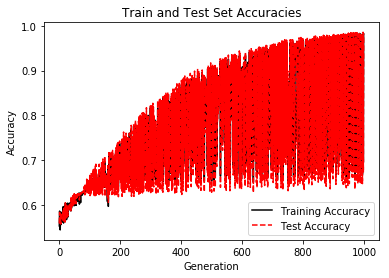

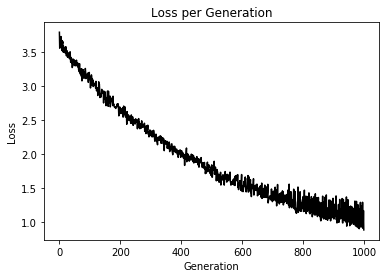

In [4]:
# Training loop
loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(epochs):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    #print(rand_y)
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)

    train_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_vals_train,
        y_target: np.transpose([y_vals_train])})
    train_accuracy.append(train_acc_temp)

    test_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_vals_test,
        y_target: np.transpose([y_vals_test])})
    test_accuracy.append(test_acc_temp)

    if (i + 1) % 100 == 0:
        print('Step #{} A = {}, b = {}'.format(
            str(i+1),
            str(sess.run(A)),
            str(sess.run(b))
        ))
        print('Loss = ' + str(temp_loss))


# Plot train/test accuracies
plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()